Null Hypothesis (Ho): There is no difference in mean sales between the 3 promotions; no promotion has a statistically significant impact on sales compared to others.
aka μ₁ = μ₂ = μ₃
Alternative Hypothesis (Ha): At least one promotion has a different mean sales.
aka μᵢ ≠ μⱼ for some i, j

In [5]:
import pandas as pd
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#import CSV dataset
df = pd.read_csv("E:/Side Projects/Marketing-Campaign-A-B-Test/WA_Marketing-Campaign.csv")
#print("First 5 records:", df.head())

In [7]:
#aggregate sales by LocationID (average of 4 weeks)
aggregated = df.groupby(['LocationID', 'Promotion', 'MarketSize', 'AgeOfStore'])['SalesInThousands'].mean().reset_index()

In [8]:
#split into promotion groups
promo_1 = aggregated[aggregated['Promotion'] == 1]['SalesInThousands']
promo_2 = aggregated[aggregated['Promotion'] == 2]['SalesInThousands']
promo_3 = aggregated[aggregated['Promotion'] == 3]['SalesInThousands']


In [9]:
#descriptive statistics
print("Promotion 1 Mean Sales:", promo_1.mean())
print("Promotion 2 Mean Sales:", promo_2.mean())
print("Promotion 3 Mean Sales:", promo_3.mean())

Promotion 1 Mean Sales: 58.09901162790697
Promotion 2 Mean Sales: 47.32941489361702
Promotion 3 Mean Sales: 55.364468085106374


Here, we check for ANOVA assumptions

In [10]:
#1. Normality (Shapiro-Wilk test)
_, p1 = stats.shapiro(promo_1)
_, p2 = stats.shapiro(promo_2)
_, p3 = stats.shapiro(promo_3)
print(f"\nNormality p-values: Promotion 1 ({p1:.3f}), Promotion 2 ({p2:.3f}), Promotion 3 ({p3:.3f})")


Normality p-values: Promotion 1 (0.000), Promotion 2 (0.000), Promotion 3 (0.000)


In [11]:
#2. Homogeneity of variances (Levene's test)
_, p_levene = stats.levene(promo_1, promo_2, promo_3)
print(f"\nLevene's Test p-value: {p_levene:.3f}")



Levene's Test p-value: 0.627


Now, we run ANOVA or Kruskal-Wallis, depending on p-value

In [14]:
if p_levene > 0.05:
    #ANOVA
    _, p_anova = stats.f_oneway(promo_1, promo_2, promo_3)
    print(f"\nANOVA p-value: {p_anova:.4f}")
else:
    #Kruskal-Wallis (non-parametric)
    _, p_kruskal = stats.kruskal(promo_1, promo_2, promo_3)
    print(f"\nKruskal-Wallis p-value: {p_kruskal:.4f}")



ANOVA p-value: 0.0037


In [13]:
#post-hoc analysis if overall test is significant
if p_anova < 0.05 or p_kruskal < 0.05:
    tukey = pairwise_tukeyhsd(
        endog=aggregated['SalesInThousands'],
        groups=aggregated['Promotion'],
        alpha=0.05
    )
    print("\nTukey HSD Results:")
    print(tukey.summary())



Tukey HSD Results:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     1      2 -10.7696  0.004 -18.5951  -2.944   True
     1      3  -2.7345 0.6862 -10.5601   5.091  False
     2      3   8.0351 0.0371   0.3854 15.6847   True
-----------------------------------------------------


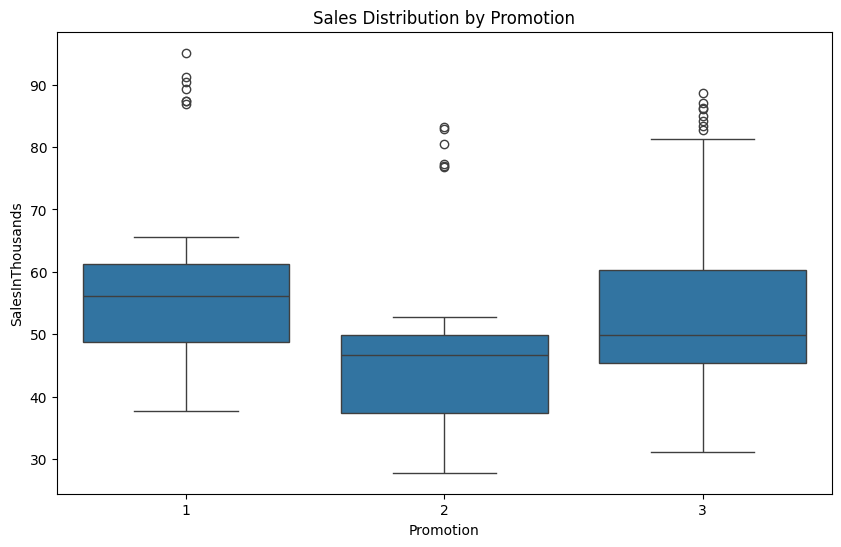

In [15]:
#visualize results
plt.figure(figsize=(10, 6))
sns.boxplot(x='Promotion', y='SalesInThousands', data=aggregated)
plt.title("Sales Distribution by Promotion")
plt.show()